# Loan Status Prediction

## Data preprocessing

### importing libraries :

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### importing data set

In [2]:
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

In [3]:
test_data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN         Urban  
4             1.0         Urban

In [4]:
train_data

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
6    LP001013    Male     Yes          0  Not Graduate            No   
7    LP001014    Male     Yes         3+      Graduate            No   
8    LP001018    Male     Yes          2      Graduate            No   
9    LP001020    Male     Yes          1      Graduate            No   
10   LP001024    Male     Yes          2      Graduate            No   
11   LP001027    Male     Yes          2      Graduate           NaN   
12   LP001028    Male     Yes          2      Graduate            No   
13   LP001029    Male      No          0      Graduate            No   
14   LP001030    Male     Yes          2      Graduate            No   
15   LP001032    Male      No          0      Graduate            No   
16   LP001034    Male      No          1  Not Graduate            No   
17   LP001036  Female      No          0      Graduate            No   
18   LP001038    Male     Yes          0  Not Graduate            No   
19   LP001041    Male     Yes          0      Graduate           NaN   
20   LP001043    Male     Yes          0  Not Graduate            No   
21   LP001046    Male     Yes          1      Graduate            No   
22   LP001047    Male     Yes          0  Not Graduate            No   
23   LP001050     NaN     Yes          2  Not Graduate            No   
24   LP001052    Male     Yes          1      Graduate           NaN   
25   LP001066    Male     Yes          0      Graduate           Yes   
26   LP001068    Male     Yes          0      Graduate            No   
27   LP001073    Male     Yes          2  Not Graduate            No   
28   LP001086    Male      No          0  Not Graduate            No   
29   LP001087  Female      No          2      Graduate           NaN   
..        ...     ...     ...        ...           ...           ...   
584  LP002911    Male     Yes          1      Graduate            No   
585  LP002912    Male     Yes          1      Graduate            No   
586  LP002916    Male     Yes          0      Graduate            No   
587  LP002917  Female      No          0  Not Graduate            No   
588  LP002925     NaN      No          0      Graduate            No   
589  LP002926    Male     Yes          2      Graduate           Yes   
590  LP002928    Male     Yes          0      Graduate            No   
591  LP002931    Male     Yes          2      Graduate           Yes   
592  LP002933     NaN      No         3+      Graduate           Yes   
593  LP002936    Male     Yes          0      Graduate            No   
594  LP002938    Male     Yes          0      Graduate           Yes   
595  LP002940    Male      No          0  Not Graduate            No   
596  LP002941    Male     Yes          2  Not Graduate           Yes   
597  LP002943    Male      No        NaN      Graduate            No   
598  LP002945    Male     Yes          0      Graduate           Yes   
599  LP002948    Male     Yes          2      Graduate            No   
600  LP002949  Female      No         3+      Graduate           NaN   
601  LP002950    Male     Yes          0  Not Graduate           NaN   
602  LP002953    Male     Yes         3+      Graduate            No   
603  LP002958    Male      No          0      Graduate            No   
604  LP002959  Female     Yes          1      Graduate            No   
605  LP002960    Male     Yes          0  Not Graduate            No   
606  LP002961    Male     Yes          1      Graduate            No   
607  LP002964    Male     Yes          2  Not 

In [5]:
train_data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [6]:
test_data.shape

(367, 12)

In [7]:
train_data.shape

(614, 13)

### visualization

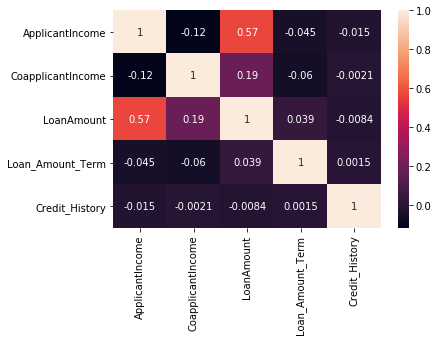

In [8]:
sns.heatmap(train_data.corr(),annot = True)

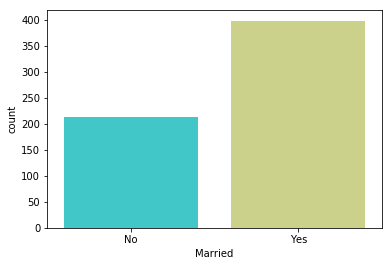

In [9]:
sns.countplot('Married',data = train_data, palette = "rainbow")

C:\Users\adida\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\adida\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


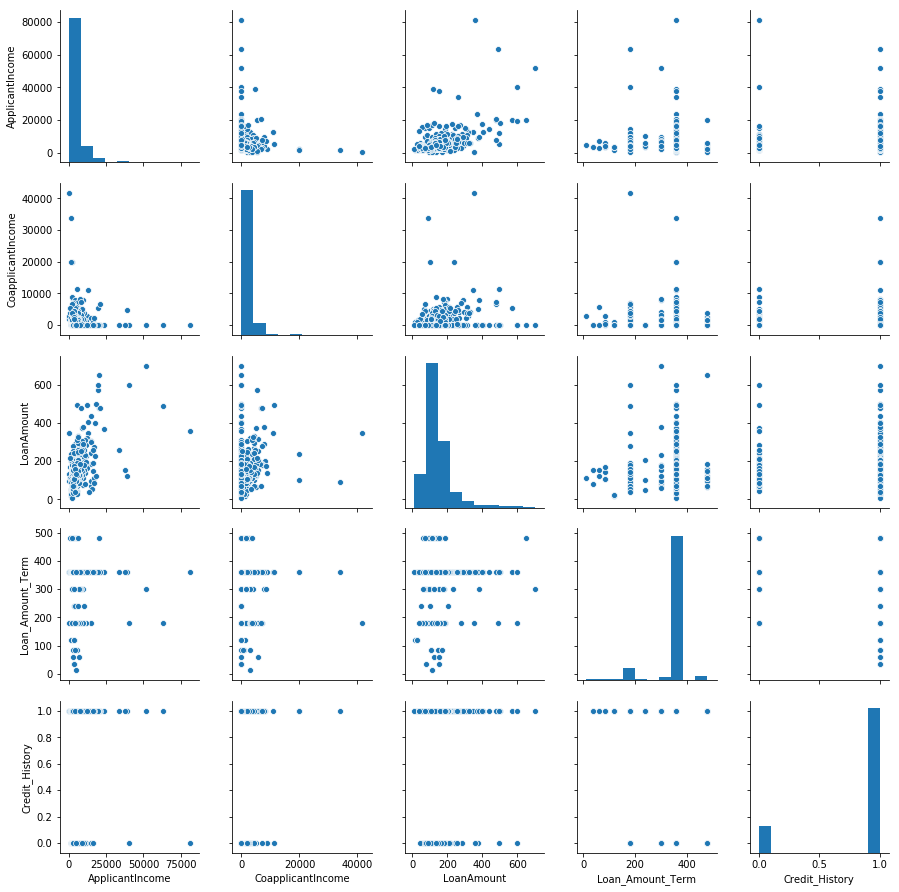

In [10]:
sns.pairplot(train_data)

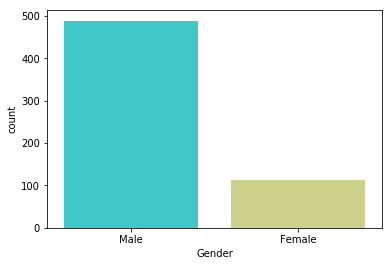

In [11]:
sns.countplot('Gender',data = train_data, palette = "rainbow")

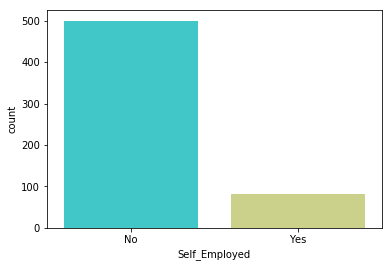

In [12]:
sns.countplot('Self_Employed',data = train_data, palette = "rainbow")

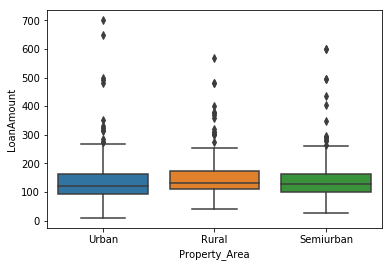

In [13]:
sns.boxplot(x = "Property_Area",y = "LoanAmount",data = train_data)

### handling null values

In [14]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [15]:
test_data.shape

(367, 12)

In [16]:
train_data.shape

(614, 13)

In [17]:
test_data.isnull().any()

Loan_ID              False
Gender                True
Married              False
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
dtype: bool

In [18]:
train_data.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [19]:
train_data['Gender'].fillna(train_data['Gender'].mode()[0],inplace = True)
train_data['Married'].fillna(train_data['Married'].mode()[0],inplace = True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0],inplace = True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0],inplace = True)
train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(),inplace = True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mean(),inplace = True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0],inplace = True)

In [20]:
train_data.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [21]:
test_data['Gender'].fillna(test_data['Gender'].mode()[0],inplace = True)
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0],inplace = True)
test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0],inplace = True)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].mean(),inplace = True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mean(),inplace = True)
test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0],inplace = True)

In [22]:
test_data.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
dtype: bool

### label encoding

In [23]:
train_data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['Gender'] = le.fit_transform(train_data['Gender'])
train_data['Married'] = le.fit_transform(train_data['Married'])
train_data['Education'] = le.fit_transform(train_data['Education'])
train_data['Self_Employed'] = le.fit_transform(train_data['Self_Employed'])
train_data['Property_Area'] = le.fit_transform(train_data['Property_Area'])
train_data['Loan_Status'] = le.fit_transform(train_data['Loan_Status'])
train_data['Dependents'] = le.fit_transform(train_data['Dependents'])

In [25]:
train_data.drop(['Loan_ID'],axis = 1,inplace = True)

In [26]:
train_data.head(10)

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          0              0             5849   
1       1        1           1          0              0             4583   
2       1        1           0          0              1             3000   
3       1        1           0          1              0             2583   
4       1        0           0          0              0             6000   
5       1        1           2          0              1             5417   
6       1        1           0          1              0             2333   
7       1        1           3          0              0             3036   
8       1        1           2          0              0             4006   
9       1        1           1          0              0            12841   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.000000             360.0             1.0   
5             4196.0  267.000000             360.0             1.0   
6             1516.0   95.000000             360.0             1.0   
7             2504.0  158.000000             360.0             0.0   
8             1526.0  168.000000             360.0             1.0   
9            10968.0  349.000000             360.0             1.0   

   Property_Area  Loan_Status  
0              2            1  
1              0            0  
2              2            1  
3              2            1  
4              2            1  
5              2            1  
6              2            1  
7              1            0  
8              2            1  
9              1            0

In [27]:
train_data['Loan_Amount_Term'].unique()

array([360., 120., 240., 342., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [28]:
train_data.shape

(614, 12)

In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null int32
Married              614 non-null int32
Dependents           614 non-null int32
Education            614 non-null int32
Self_Employed        614 non-null int32
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int32
Loan_Status          614 non-null int32
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


### one hot encoding 

In [30]:
x = train_data.iloc[:,0:11].values
y = train_data.iloc[:,11:].values

In [31]:
x.shape

(614, 11)

In [32]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()
p = oh.fit_transform(x[:,2:3]).toarray()

C:\Users\adida\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [33]:
x.shape

(614, 11)

In [34]:
q = oh.fit_transform(x[:,10:11]).toarray()

C:\Users\adida\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [35]:
x.shape

(614, 11)

In [36]:
x = np.delete(x,2,axis = 1)

In [37]:
x.shape

(614, 10)

In [38]:
x = np.delete(x,9,axis = 1)

In [39]:
x.shape

(614, 9)

In [40]:
x = np.concatenate((q,p,x), axis = 1)

In [41]:
x.shape

(614, 16)

In [42]:
x.shape

(614, 16)

### scaling

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 0)

In [44]:
x_test.shape

(62, 16)

In [45]:
x_train.shape

(552, 16)

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# LOGISTIC REGRESSION

In [47]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(x_train,y_train)

C:\Users\adida\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adida\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
y_pred = logistic.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score
logacc = accuracy_score(y_test,y_pred)

In [50]:
logacc

0.8709677419354839

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [52]:
cm

array([[ 8,  7],
       [ 1, 46]], dtype=int64)

In [53]:
import sklearn.metrics as metrics
fpr , tpr , threshold = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr,tpr)

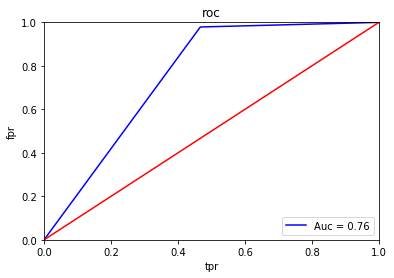

In [54]:
plt.title("roc")
plt.plot(fpr,tpr,color =  'blue',label = 'Auc = %0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.show()

### exporting pickle file 

In [55]:
import pickle
pickle.dump(logistic,open('loan_status.pkl','wb'))

# DECISION TREE CLASSIFIER

In [56]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [57]:
decisiontree = classifier.predict(x_test)

In [58]:
cm2 = confusion_matrix(y_test,decisiontree)

In [59]:
import sklearn.metrics as metrics
fpr1 , tpr1 , threshold1 = metrics.roc_curve(y_test,decisiontree)
roc_auc1 = metrics.auc(fpr1,tpr1)

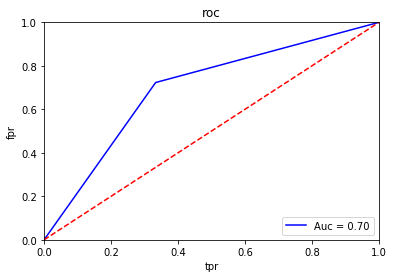

In [60]:
plt.title("roc")
plt.plot(fpr1,tpr1,color =  'blue',label = 'Auc = %0.2f'% roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.show()

In [61]:
desacc = accuracy_score(y_test,decisiontree)

In [62]:
desacc

0.7096774193548387

# RANDOM FOREST CLASSIFIER

In [63]:
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier(n_estimators = 20 , random_state = 0)
rand.fit(x_train,y_train) 

C:\Users\adida\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [64]:
randomforest = rand.predict(x_test)

In [65]:
cm3 = confusion_matrix(y_test,randomforest)

In [66]:
randacc = accuracy_score(y_test,randomforest)

In [67]:
randacc

0.8064516129032258

In [68]:
fpr2 , tpr2 , threshold2 = metrics.roc_curve(y_test,randomforest)
roc_auc2 = metrics.auc(fpr2,tpr2)

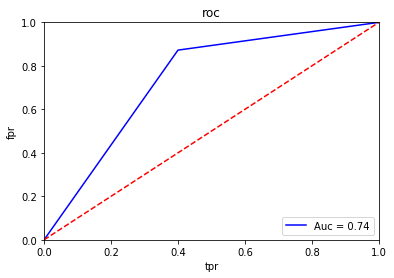

In [69]:
plt.title("roc")
plt.plot(fpr2,tpr2,color =  'blue',label = 'Auc = %0.2f'% roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.show()

# K NEAREST NEIGHBOURS 

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier(n_neighbors = 5 , metric = 'minkowski')
knn.fit(x_train,y_train)


C:\Users\adida\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [71]:
knnpred = knn.predict(x_test)

In [72]:
knnacc = accuracy_score(y_test,knnpred)

In [73]:
knnacc

0.8387096774193549

In [74]:
cm4 = confusion_matrix(y_test,knnpred)

In [75]:
fpr3 , tpr3 , threshold3 = metrics.roc_curve(y_test,knnpred)
roc_auc3 = metrics.auc(fpr3,tpr3)

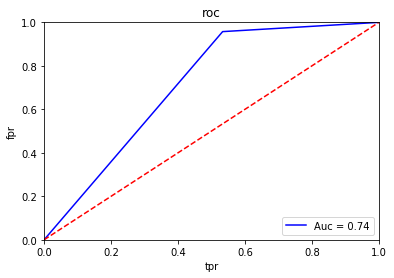

In [76]:
plt.title("roc")
plt.plot(fpr3,tpr3,color =  'blue',label = 'Auc = %0.2f'% roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.show()